In [2]:
import pickle
import pandas as pd
import numpy as np
import numpy as np; np.random.seed(0)
import seaborn as sns
import os
from matplotlib import pyplot as plt

In [3]:
plot_data_dir = 'data_for_plotting/'
plot_version = "3"



# Load all data

In [4]:
# total tweets
df_week_tot_vol = pickle.load(open("{}tweet_volume_V{}".format(plot_data_dir, plot_version), 'rb'))

# SS
df_week_SS_pos_vol = pickle.load(open("{}df_week_SS_pos_vol_V{}".format(plot_data_dir, plot_version), 'rb'))
df_week_SS_pos     = pickle.load(open("{}df_week_SS_pos_V{}".format(plot_data_dir, plot_version), 'rb'))
df_week_SS_neg_vol = pickle.load(open("{}df_week_SS_neg_vol_V{}".format(plot_data_dir, plot_version), 'rb'))
df_week_SS_neg     = pickle.load(open("{}df_week_SS_neg_V{}".format(plot_data_dir, plot_version), 'rb'))

# PATTERN
df_week_patt_pos_vol = pickle.load(open("{}df_week_patt_pos_vol_V{}".format(plot_data_dir, plot_version), 'rb'))
df_week_patt_pos     = pickle.load(open("{}df_week_patt_pos_V{}".format(plot_data_dir, plot_version), 'rb'))
df_week_patt_neg_vol = pickle.load(open("{}df_week_patt_neg_vol_V{}".format(plot_data_dir, plot_version), 'rb'))
df_week_patt_neg     = pickle.load(open("{}df_week_patt_neg_V{}".format(plot_data_dir, plot_version), 'rb'))

#TOPIC MODELLING
df_week_tm_distances_all = pickle.load(open("{}tm_distances_V{}".format(plot_data_dir, '2'), 'rb'))
df_week_tm_distances_pos = pickle.load(open("{}tm_distances_V{}_pos".format(plot_data_dir, '3'), 'rb'))
df_week_tm_distances_neg = pickle.load(open("{}tm_distances_V{}_neg".format(plot_data_dir, '2'), 'rb'))


# convert Date type
# converting the string to datetime format
df_week_tm_distances_all['date'] = pd.to_datetime(df_week_tm_distances_all['date'].dt.date)
# df_week_tm_distances
df_week_tm_distances_all = df_week_tm_distances_all.set_index('date')

df_week_tm_distances_pos['date'] = pd.to_datetime(df_week_tm_distances_pos['date'].dt.date)
# df_week_tm_distances
df_week_tm_distances_pos = df_week_tm_distances_pos.set_index('date')

df_week_tm_distances_neg['date'] = pd.to_datetime(df_week_tm_distances_neg['date'].dt.date)
# df_week_tm_distances
df_week_tm_distances_neg = df_week_tm_distances_neg.set_index('date')
df_week_tm_distances_neg

# OLD:
# # total tweets
# df_week_tot_vol = pickle.load(open("{}tweet_volume_V{}".format(plot_data_dir, plot_version), 'rb'))

# # SS
# df_week_SS_pos_vol = pickle.load(open("{}df_week_SS_pos_vol_V{}".format(plot_data_dir, "2"), 'rb'))
# df_week_SS_pos     = pickle.load(open("{}df_week_SS_pos_V{}".format(plot_data_dir, "2"), 'rb'))
# df_week_SS_neg_vol = pickle.load(open("{}df_week_SS_neg_vol_V{}".format(plot_data_dir, "2"), 'rb'))
# df_week_SS_neg     = pickle.load(open("{}df_week_SS_neg_V{}".format(plot_data_dir, "2"), 'rb'))

# # PATTERN
# df_week_patt_pos_vol = pickle.load(open("{}df_week_patt_pos_vol_V{}".format(plot_data_dir, plot_version), 'rb'))
# df_week_patt_pos     = pickle.load(open("{}df_week_patt_pos_V{}".format(plot_data_dir, plot_version), 'rb'))
# df_week_patt_neg_vol = pickle.load(open("{}df_week_patt_neg_vol_V{}".format(plot_data_dir, plot_version), 'rb'))
# df_week_patt_neg     = pickle.load(open("{}df_week_patt_neg_V{}".format(plot_data_dir, plot_version), 'rb'))

# #TOPIC MODELLING
# df_week_tm_distances = pickle.load(open("{}tm_distances_V{}".format(plot_data_dir, plot_version), 'rb'))
# # convert Date type
# # converting the string to datetime format
# df_week_tm_distances['date'] = pd.to_datetime(df_week_tm_distances['date'].dt.date)
# # df_week_tm_distances
# df_week_tm_distances = df_week_tm_distances.set_index('date')

,Mean Jaccard distance,Std
date,,
2019-06-08,0.910399,0.044353
2019-06-15,0.913098,0.049655
2019-06-22,0.936952,0.040414
2019-06-29,0.952392,0.034448
2019-07-06,0.951986,0.035030
...,...,...
2021-06-26,0.917841,0.048385
2021-07-03,0.890822,0.059089
2021-07-10,0.868434,0.067809


In [5]:
# Rename duplicate column names

df_week_SS_pos_vol = df_week_SS_pos_vol.rename(columns={"pos_senti": "SS number of postive tweets"})
df_week_SS_pos = df_week_SS_pos.rename(columns={"pos_senti": "SS average postive tweets"})
df_week_SS_neg_vol = df_week_SS_neg_vol.rename(columns={"neg_senti": "SS number of negative tweets"})
df_week_SS_neg = df_week_SS_neg.rename(columns={"neg_senti_abs": "SS average of negative tweets"})
df_week_patt_pos_vol = df_week_patt_pos_vol.rename(columns={"pattern_senti": "Pattern number of postive tweets"})
df_week_patt_pos = df_week_patt_pos.rename(columns={"pattern_senti": "pattern average positive sentiment"})
df_week_patt_neg_vol = df_week_patt_neg_vol.rename(columns={"pattern_senti": "pattern number of negative tweets"})
df_week_patt_neg = df_week_patt_neg.rename(columns={"pattern_senti_abs": "pattern average of negative tweets"})


df_week_tm_distances_all = df_week_tm_distances_all.rename(columns={"Mean Jaccard distance": "All tweets"})
df_week_tm_distances_pos = df_week_tm_distances_pos.rename(columns={"Mean Jaccard distance": "Positive tweets"})
df_week_tm_distances_neg = df_week_tm_distances_neg.rename(columns={"Mean Jaccard distance": "Negative tweets"})


print(df_week_SS_pos_vol.columns)
print(df_week_SS_pos.columns)
print(df_week_SS_neg_vol.columns)
print(df_week_SS_neg.columns)
print('\n')
print(df_week_patt_pos_vol.columns)
print(df_week_patt_pos.columns)
print(df_week_patt_neg_vol.columns)
print(df_week_patt_neg.columns)
print('\n')
print(df_week_tm_distances_all.columns)
print(df_week_tm_distances_pos.columns)
print(df_week_tm_distances_neg.columns)

Index(['SS number of postive tweets'], dtype='object')
Index(['SS average postive tweets'], dtype='object')
Index(['SS number of negative tweets'], dtype='object')
Index(['SS average of negative tweets'], dtype='object')


Index(['Pattern number of postive tweets'], dtype='object')
Index(['pattern average positive sentiment'], dtype='object')
Index(['pattern number of negative tweets'], dtype='object')
Index(['pattern average of negative tweets'], dtype='object')


Index(['All tweets', 'Std'], dtype='object')
Index(['Positive tweets', 'Std'], dtype='object')
Index(['Negative tweets', 'Std'], dtype='object')


# Merge all data into one DataFrame

In [6]:
df_plot = df_week_SS_pos_vol

df_plot['number of tweets per week'] = df_week_tot_vol['number of tweets per week']

#SS
df_plot['SS number of postive tweets'] = df_week_SS_pos_vol['SS number of postive tweets']
df_plot['SS number of negative tweets'] = df_week_SS_neg_vol['SS number of negative tweets']
df_plot['SS average positive sentiment'] = df_week_SS_pos['SS average postive tweets']
df_plot['SS average negative sentiment'] = df_week_SS_neg['SS average of negative tweets']

#Pattern
df_plot['Pattern number of postive tweets'] = df_week_patt_pos_vol['Pattern number of postive tweets']
df_plot['Pattern number of negative tweets'] = df_week_patt_neg_vol['pattern number of negative tweets']
df_plot['Pattern average positive sentiment'] = df_week_patt_pos['pattern average positive sentiment']
df_plot['Pattern average negative sentiment'] = df_week_patt_neg['pattern average of negative tweets']

# TOPIC MODELLING
# df_plot['Mean Jaccard distance all'] = df_week_tm_distances_all['Mean Jaccard distance']
# df_plot['Mean Jaccard distance positive'] = df_week_tm_distances_pos['Mean Jaccard distance']
# df_plot['Mean Jaccard distance negative'] = df_week_tm_distances_neg['Mean Jaccard distance']

# df_plot['Mean Jaccard distance positive']
df_week_tm_distances_pos['Positive tweets']

date
2019-06-08    0.938303
2019-06-15    0.927048
2019-06-22    0.961628
2019-06-29    0.957326
2019-07-06    0.986150
                ...   
2021-06-26    0.909801
2021-07-03    0.948097
2021-07-10    0.958217
2021-07-17    0.953209
2021-07-24    0.940150
Name: Positive tweets, Length: 112, dtype: float64

In [7]:
df_week_tm_distances_all.columns
df_week_tm_distances_pos.columns
df_week_tm_distances_neg.columns

# df_week_patt_neg['pattern average of negative tweets']

Index(['Negative tweets', 'Std'], dtype='object')

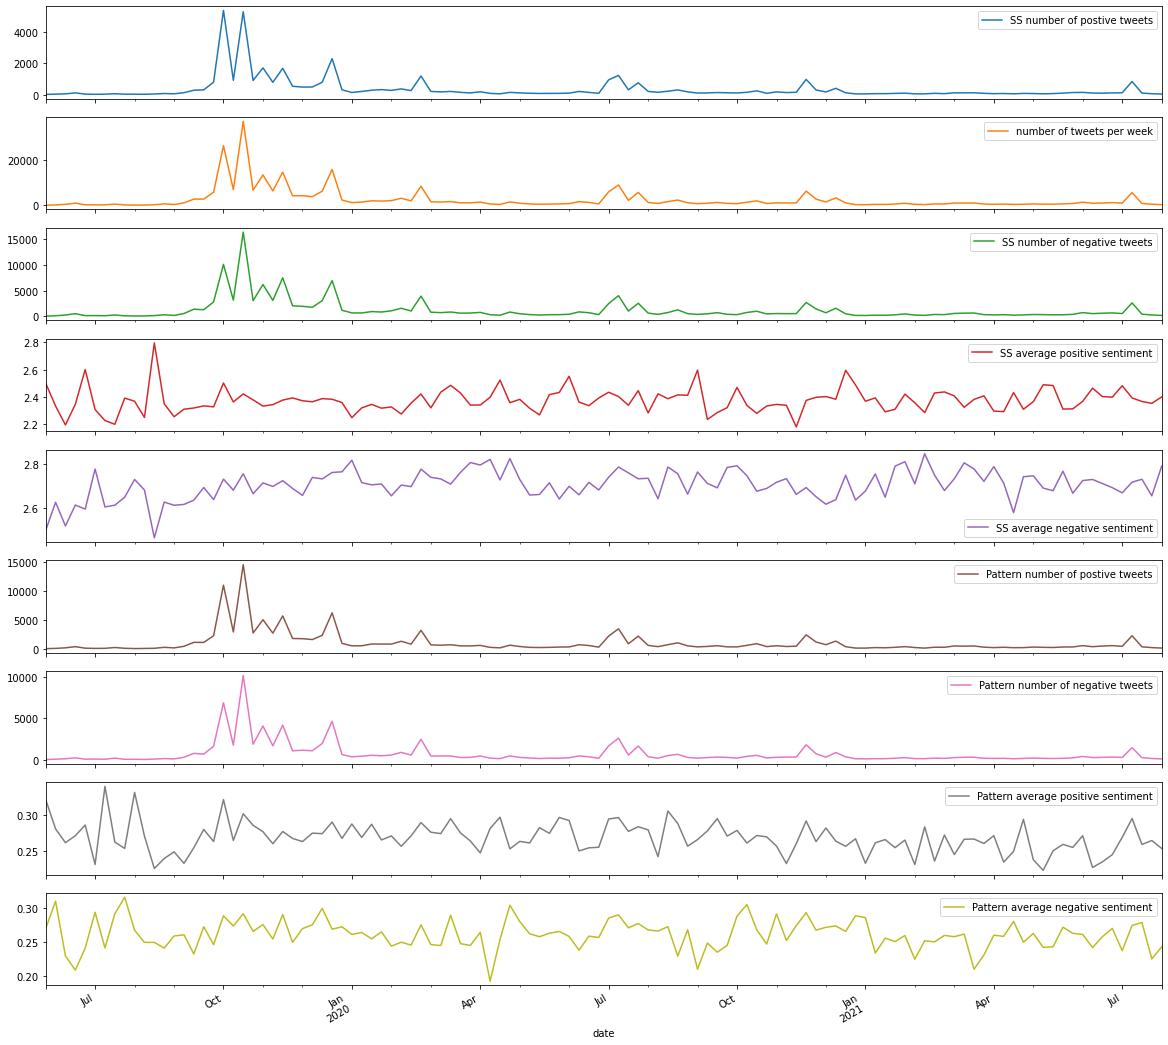

In [8]:
ax = df_plot.plot(subplots=True, figsize=(20, 20))
# ax.set_xlim('2019-06-01 00:00:00','2021-06-30 23:59:59')

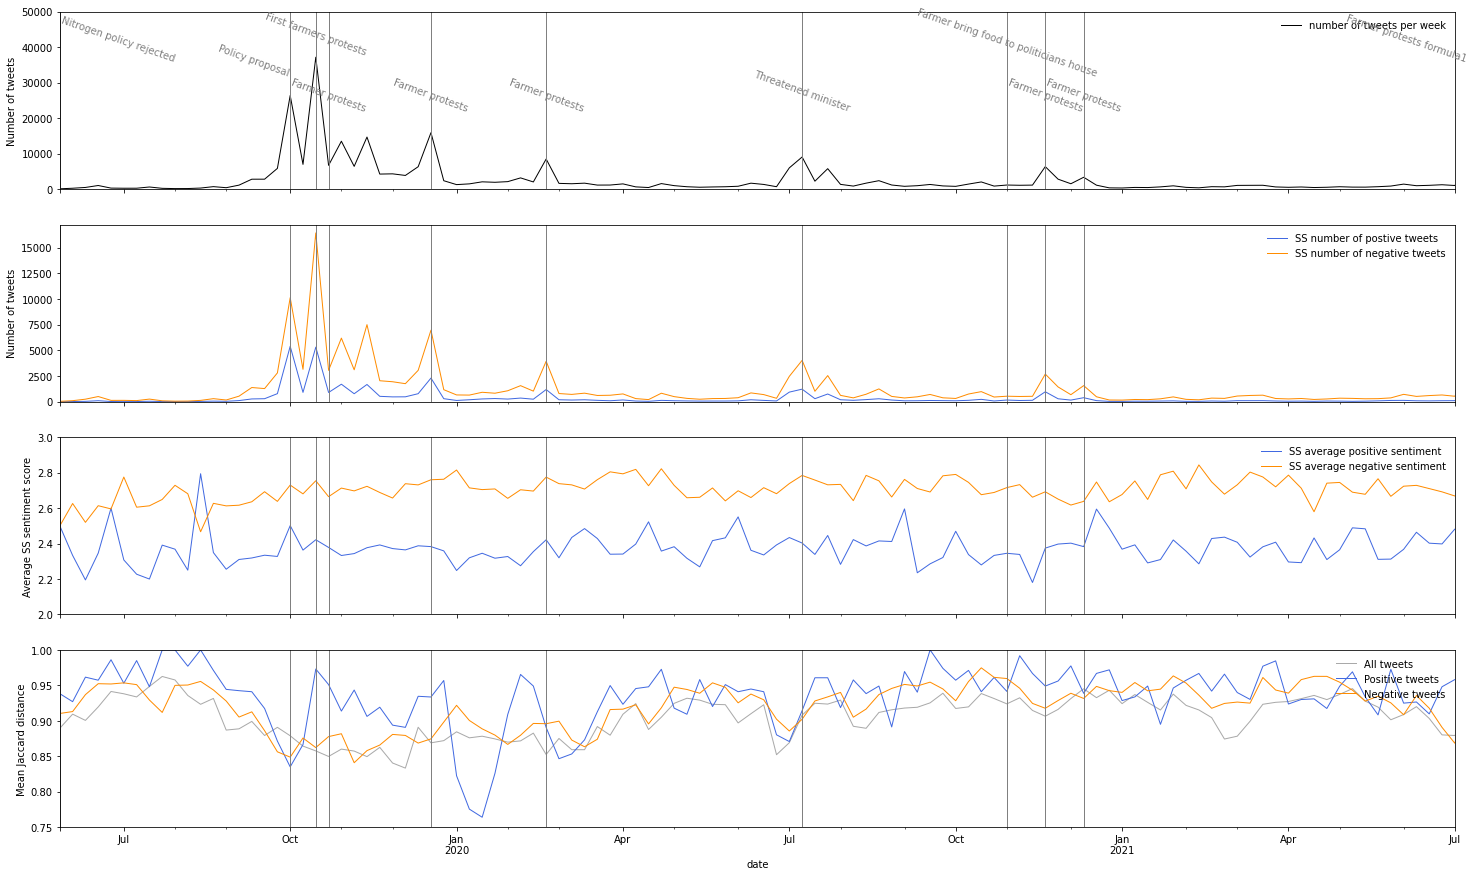

In [27]:
fig, axes = plt.subplots(nrows=4,
                         ncols=1,
                         sharex=True)

# PLOT TOTAL WEEKLY TWEETS
df_plot['number of tweets per week'].plot(ax=axes[0], linewidth=1, color="black", linestyle='solid')

# # PLOT PATTERN SENTIMENT RESULTS
# df_plot['Pattern number of postive tweets'].plot(ax=axes[1], linewidth=1, color="blue", linestyle='solid')
# df_plot['Pattern number of negative tweets'].plot(ax=axes[1], linewidth=1, color='orange', linestyle='solid')
# df_plot['Pattern average positive sentiment'].plot(ax=axes[2], linewidth=1, color="blue")
# df_plot['Pattern average negative sentiment'].plot(ax=axes[2], linewidth=1, color='orange')

# PLOT SS SENTIMENT RESULTS
df_plot['SS number of postive tweets'].plot(ax=axes[1], linewidth=1, color="royalblue", linestyle='solid')
df_plot['SS number of negative tweets'].plot(ax=axes[1], linewidth=1, color='darkorange', linestyle='solid')
df_plot['SS average positive sentiment'].plot(ax=axes[2], linewidth=1, color="royalblue")
df_plot['SS average negative sentiment'].plot(ax=axes[2], linewidth=1, color='darkorange')


# PLOT TOPIC MODELLING RESULTS
df_week_tm_distances_all['All tweets'].plot(ax=axes[3], linewidth=1,figsize=(25,15), color="darkgrey")
df_week_tm_distances_pos['Positive tweets'].plot(ax=axes[3], linewidth=1, color="royalblue")
df_week_tm_distances_neg['Negative tweets'].plot(ax=axes[3], linewidth=1, color="darkorange")

axes[0].set_ylabel("Number of tweets")
axes[0].set_ylim(0, 50000)
axes[1].set_xlim('2019-06-01 00:00:00','2021-06-30 23:59:59')
axes[1].set_ylim(0)
axes[1].set_ylabel("Number of tweets")
axes[2].set_ylabel("Average SS sentiment score")
axes[3].set_ylabel("Mean Jaccard distance")
axes[2].set_ylim(2, 3)
axes[3].set_ylim(0.75, 1.0)


leg0 = axes[0].legend(loc='upper right', frameon=False)
leg1 = axes[1].legend(loc='upper right', frameon=False)
leg2 = axes[2].legend(loc='upper right', frameon=False)
leg3 = axes[3].legend(loc='upper right', frameon=False)
# leg4 = axes[4].legend(loc='upper right', frameon=False)
# leg5 = axes[5].legend(loc='upper right', frameon=False)

# 7th November 2018-11-07
# 29th May 2019-05-29
# 4th October 2019-10-04
# 14th-17th October 2019-10-14
# 25th October 2019-10-25
# 18th December 2019-12-18
# 18th and 19th of February, 2020-02-18
# 8th July 2020-07-08
# October 2020-10-15
# November 2020-11-15
# December 2020-12-15
# ¬¬7th July 2021-07-07


events = [["Nitrogen policy rejected", pd.Timestamp('2019-05-29')], ["Policy proposal", pd.Timestamp('2019-10-04')], ["First farmers protests", pd.Timestamp('2019-10-14')], ["Farmer protests", pd.Timestamp('2019-12-18')], ["Threatened minister", pd.Timestamp('2020-07-8')], ["Farmer protests formula1", pd.Timestamp('2021-07-7')], ["Farmer protests", pd.Timestamp('2020-02-18')], ["Farmer protests", pd.Timestamp('2020-12-13')], ["Farmer protests", pd.Timestamp('2020-11-17')], ["Farmer bring food to politicians house", pd.Timestamp('2020-10-27')], ["Farmer protests", pd.Timestamp('2019-10-25')]]



for ax in axes:
    for event in events:
        ax.axvline(event[1], color='grey', linewidth=1)
        

for event in events:
    if event[0] == "Policy proposal":
        ax.text(event[1], 1.81, event[0], rotation=-20, horizontalalignment='right', color='grey')
    elif event[0] == "First farmers protests":
        ax.text(event[1], 1.84, event[0], rotation=-20, horizontalalignment='center', color='grey')
    elif event[0] == "Farmer bring food to politicians house":
        ax.text(event[1], 1.81, event[0], rotation=-19, horizontalalignment='center', color='grey')
    elif event[0] == "Nitrogen policy rejected":
        ax.text(event[1], 1.83, event[0], rotation=-19, horizontalalignment='left', color='grey')
    elif event[0] == "Farmer protests formula1":
        ax.text(event[1], 1.83, event[0], rotation=-19, horizontalalignment='right', color='grey')    
    else:
        ax.text(event[1], 1.76, event[0], rotation=-20, horizontalalignment='center', color='grey')
        